In [18]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("Instagram visits clustering.csv")
df

,User ID,Instagram visit score,Spending_rank(0 to 100)
0,0,63,24.050708
1,1,61,25.223290
2,2,104,18.528245
3,3,82,86.890232
4,4,14,31.492397
...,...,...,...
2595,2595,25,25.745908
2596,2596,52,9.275066
2597,2597,100,84.999487
2598,2598,87,20.530806


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User ID                  2600 non-null   int64  
 1   Instagram visit score    2600 non-null   int64  
 2   Spending_rank(0 to 100)  2600 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 61.1 KB


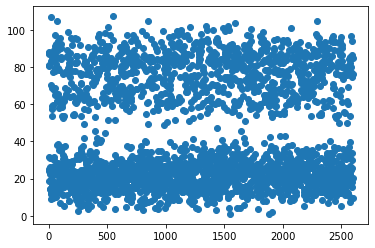

In [4]:
plt.scatter(df["User ID"],df["Spending_rank(0 to 100)"])

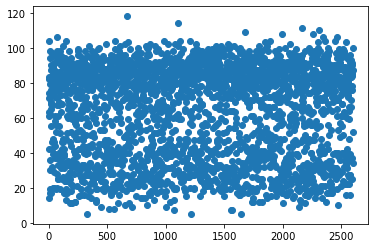

In [5]:
plt.scatter(df["User ID"],df["Instagram visit score"])

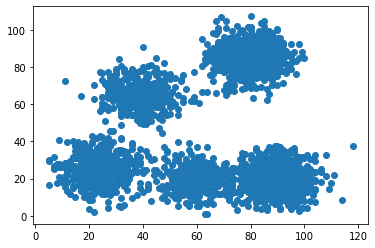

In [6]:
plt.scatter(df["Instagram visit score"],df["Spending_rank(0 to 100)"])

In [7]:
#so relevant columns are
relevant_col = df[["Instagram visit score","Spending_rank(0 to 100)"]]
relevant_col

,Instagram visit score,Spending_rank(0 to 100)
0,63,24.050708
1,61,25.223290
2,104,18.528245
3,82,86.890232
4,14,31.492397
...,...,...
2595,25,25.745908
2596,52,9.275066
2597,100,84.999487
2598,87,20.530806


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
stdsc = StandardScaler()
scaled_data = stdsc.fit_transform(relevant_col)
scaled_data

array([[-0.01217181, -0.65376894],
       [-0.08743151, -0.61298749],
       [ 1.53065202, -0.84583579],
       ...,
       [ 1.38013262,  1.46598081],
       [ 0.89094458, -0.77618835],
       [-1.10343744,  1.16650181]])

In [10]:
def find_K_values(df,max_k):
    SSE = []
    k_values = []
    for k in range(2,max_k):
        K_model = KMeans(n_clusters=k)
        K_model.fit(df)
        SSE.append(K_model.inertia_)
        k_values.append(k)
    return SSE,k_values

In [11]:
SSE,k_values = find_K_values(scaled_data,11)
k_values

[2, 3, 4, 5, 6, 7, 8, 9, 10]

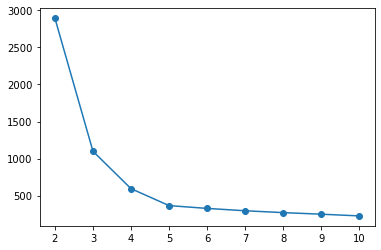

In [12]:
plt.plot(k_values,SSE,marker="o")

In [13]:
#so number of cluster should be 5 from graph
K_model = KMeans(n_clusters=5)
K_model.fit(scaled_data)

KMeans(n_clusters=5)

In [14]:
df["cluster"] = K_model.labels_
df

,User ID,Instagram visit score,Spending_rank(0 to 100),cluster
0,0,63,24.050708,0
1,1,61,25.223290,0
2,2,104,18.528245,2
3,3,82,86.890232,1
4,4,14,31.492397,4
...,...,...,...,...
2595,2595,25,25.745908,4
2596,2596,52,9.275066,0
2597,2597,100,84.999487,1
2598,2598,87,20.530806,2


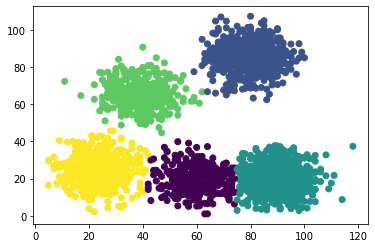

In [15]:
plt.scatter(df["Instagram visit score"],df["Spending_rank(0 to 100)"],c=df["cluster"])

# AgglomerativeClustering

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

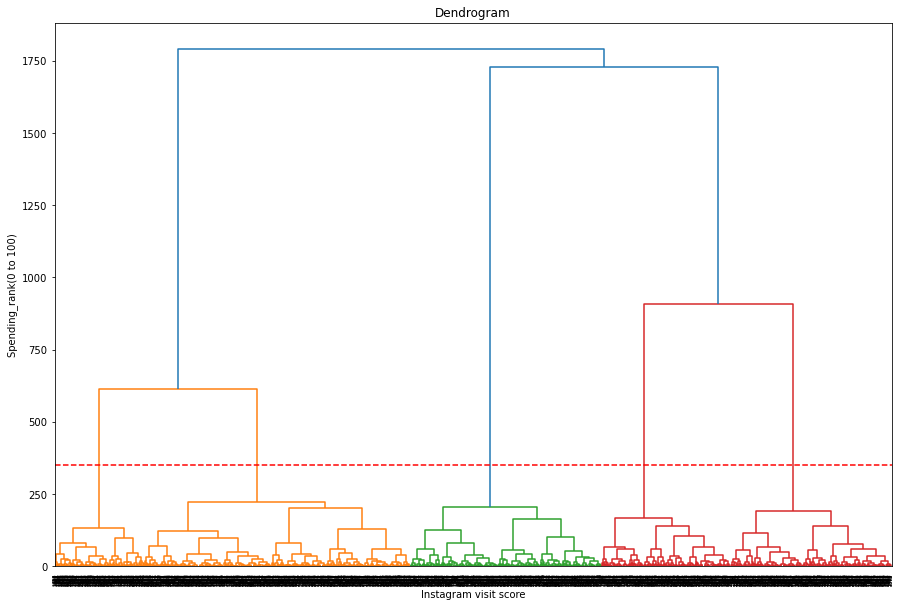

In [19]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(relevant_col, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Instagram visit score')
plt.ylabel('Spending_rank(0 to 100)')
plt.axhline(y=350, color='r', linestyle='--')
plt.show()

In [20]:
from sklearn.cluster import AgglomerativeClustering

In [23]:
agglo_model = AgglomerativeClustering(n_clusters=5,linkage='ward')
y_hc = agglo_model.fit_predict(scaled_data)

array([4, 4, 0, ..., 2, 0, 3], dtype=int64)